<a href="https://colab.research.google.com/github/ramiro-l/ModelosYSimulacionFAMAF/blob/main/Pr%C3%A1ctico7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctico 7

- Para estos ejercicios, estudiar:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html

- Otra bibliografia interesante es
https://relopezbriega.github.io/blog/2016/06/29/distribuciones-de-probabilidad-con-python/

- No utilice implementaciones personales de densidades a menos que el ejercicio se lo pida exactamente.

- **Convención general**: al obtener valores decimales suponemos una distribución continua.

## Ejercicio 1

De acuerdo con la teoría genética de Mendel, cierta planta de guisantes debe producir flores blancas, rosas o rojas con probabilidad 1/4, 1/2 y 1/4, respectivamente.

Para verificar experimentalmente la teoría, se estudió una muestra de 564 guisantes, donde se encontró que 141 produjeron flores blancas, 291 flores rosas y 132 flores rojas. Aproximar el p-valor de esta muestra:

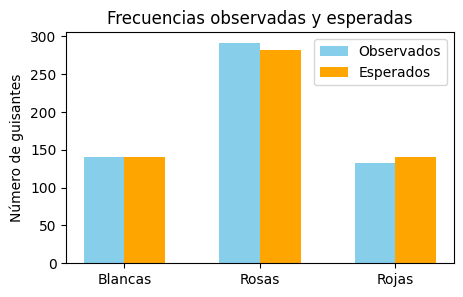

In [1]:
#@title Grafico
import matplotlib.pyplot as plt
import numpy as np

categorias = ['Blancas', 'Rosas', 'Rojas']
observados = np.array([141, 291, 132])
total = sum(observados)

prob_teoricas = np.array([0.25, 0.5, 0.25])
esperados = total * prob_teoricas

x = np.arange(len(categorias))

plt.figure(figsize=(5, 3))
plt.bar(x - 0.15, observados, width=0.3, label='Observados', color='skyblue')
plt.bar(x + 0.15, esperados, width=0.3, label='Esperados', color='orange')

plt.xticks(x, categorias)
plt.ylabel('Número de guisantes')
plt.title('Frecuencias observadas y esperadas')
plt.legend();plt.show()


### a)

Utilizando la prueba de Pearson con aproximación chi-cuadrada

Para ello primero notar que:

$$
p_1 = 0.25 \;,\;
p_2 = 0.5 \;y\;
p_3 = 0.25
$$

y ademas en base a la muestra dada:

$$n = 564$$

$$
N_1 = 141 \;,\;
N_2 = 291 \;y\;
N_3 = 132
$$

ahora si con todos estos valores podemos calcular en base al estadistico $T$ el valor de $t_0$:

\begin{align*}
t_0 & = \sum_{i=1}^{3} \frac{(N_i - n⋅p_i)^2}{n⋅p_i} \\
& = \frac{(N_1 - n⋅p_1)^2}{n⋅p_1} + \frac{(N_2 - n⋅p_2)^2}{n⋅p_2} + \frac{(N_3 - n⋅p_3)^2}{n⋅p_3} \\
& = \frac{(141 - 564⋅0.25)^2}{564⋅0.25} + \frac{(291 - 564⋅0.5)^2}{564⋅0.5} + \frac{(132 - 564⋅0.25)^2}{564⋅0.25} \\
& = \frac{(141 - 141)^2}{141} + \frac{(291 - 282)^2}{282} + \frac{(132 - 141)^2}{141} \\
& = \frac{(0)^2}{141} + \frac{(9)^2}{282} + \frac{(-9)^2}{141} \\
& = 0 + \frac{81}{282} + \frac{81}{141} \\
& = \frac{81}{282} + \frac{81}{141} \\
& ≃ 0,8617
\end{align*}

con este calculo tengo que:

$$
p-valor = P(T ≥ t_0) = P(X_2^2 ≥ t_0) = P(X_2^2 ≥  0,86170) ≃ 0.65
$$

Dado que es un valor alto: **no hay evidencia para rechazar $H_0$**.

In [2]:
#@title Estadistico de Pearson
import numpy as np

def estadistico_pearson(frecuencias, p_hip_0, cant_valores):
    assert sum(frecuencias) == cant_valores
    assert len(frecuencias) == len(p_hip_0)

    valores_esperados = np.array([cant_valores*p for p in p_hip_0])
    return np.sum((frecuencias - valores_esperados) ** 2 / valores_esperados)


print(f"t_0: {estadistico_pearson([141,291,132], [0.25,0.5,0.25], 564):.16f}")

t_0: 0.8617021276595745


In [60]:
#@title Calculo p-valor (Chi-Cuad)
from scipy.stats import chi2


# NOTE: chi2.sf(x, df) = 1 - chi2.cdf(x, df)

print(f"p-valor: {chi2.sf(0.8617, 2):.2f}")
# print(f"p-valor: {1 - chi2.cdf(0.8617, 2):.2f}")

t_0 = estadistico_pearson([141,291,132], [0.25,0.5,0.25], 564)
print(f"p-valor (más exacto): {chi2.sf(t_0, 2)}")
# print(f"p-valor (más exacto): {1 - chi2.cdf(t_0, 2)}")

p-valor: 0.65
p-valor (más exacto): 0.6499557054800363
p-valor: 0.6499557054800363


### b)

Realizando una simulación

In [4]:
#@title Codigo full Teorico
import numpy as np

# NOTE: (alternativa)
# from scipy.stats import rv_discrete
#
# Agregar esto antes del for
# dist = rv_discrete(values=(valores_posibles, ps))
#
# Cambiar por el np.random.choice
# muestra = dist.rvs(size=564)


def ej1b_p_valor_teorico(tam_muestra, t_0, ps, n_sim):
    cant_valores = len(ps)

    # Abstraemos los valores posibles a [0, 1, ...]
    valores_posibles = list(range(cant_valores))

    # Dado que los valores esperados son constantes los calculamos
    valores_esperados = np.array([tam_muestra*p for p in ps])

    p_valor = 0
    for _ in range(n_sim):
        # Generamos una muestra
        muestra = np.random.choice(a=valores_posibles, p=ps, size=tam_muestra)
        # muestra = binom.rvs(n_restante, ps_i) # NOTA: usando scipy.stats

        # Contamos las frecuencias
        N_i = np.bincount(muestra, minlength=cant_valores)

        # Calculamos el estadistico de pearson
        T = np.sum((N_i - valores_esperados) ** 2 / valores_esperados)

        if T >= t_0:
            p_valor += 1

    return p_valor / n_sim

ej1b_p_valor_teorico(564, 0.8617, [0.25, 0.5, 0.25], 100_000)

0.65395

In [5]:
%%timeit
ej1b_p_valor_teorico(564, 0.8617, [0.25, 0.5, 0.25], 10_000)

499 ms ± 15.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### Codigo mejorado con Binomiales

Notar que la mejora viene por el lado que solo necesitamos las frecuencias observadas, por esta razon usamos binomiales para ello y evitamos generar la muestra con la distribución.

Para ello en cada paso $(i)$, teniendo en cuenta $k$ terminos calculamos:

\begin{align*}
N_1^{(i)} & = Bin(m, p_1) \\
& = Bin(m, \frac{p_1}{1}) \\
N_2^{(i)} & = Bin(m-N_1^{(i)}, \frac{p_2}{1 - p_1}) \\
N_3^{(i)} & = Bin(m-N_1^{(i)}-N_2^{(i)}, \frac{p_3}{1 - p_1 - p_2}) \\
& \quad \quad \quad \quad \quad \quad \cdots \\
N_j^{(i)} & = Bin(m-N_1^{(i)}-…-N_{j-1}^{(i)}, \frac{p_j}{1 - p_1 - … - p_{j-1}}) \\
& = Bin(m - \sum_{l=1}^{j-1}N_l^{(i)}, \frac{p_j}{1 - \sum_{l=1}^{j-1} p_l }) \\
& \quad \quad \quad \quad \quad \quad \cdots \\
N_k^{(i)} & = Bin(M, \frac{p_k}{1 - \sum_{l=1}^{k-1} p_l })  \\
\end{align*}

Analicemos el ultimo caso:

\begin{align*}
N_k^{(i)} & = Bin(m - \sum_{l=1}^{k-1}N_l^{(i)}, \frac{p_k}{1 - \sum_{l=1}^{k-1} p_l }) \\
\end{align*}

Definamos $M = m - \sum_{l=1}^{k-1}N_l^{(i)}$ para que se entienda mejor. Luego:

\begin{align*}
N_k^{(i)} & = Bin(M, \frac{p_k}{1 - \sum_{l=1}^{k-1} p_l }) \\
\end{align*}

dado que los $p_i$ son probabilidades tenemos que:

\begin{align*}
\sum_{l=1}^{k} p_l & = 1 \\
\sum_{l=1}^{k-1} p_l + p_k & = 1 \\
p_k & = 1 - \sum_{l=1}^{k-1} p_l \\
\end{align*}

por lo tanto en $N_k^{(i)}$ nos queda que:

\begin{align*}
N_k^{(i)} & = Bin(M, \frac{p_k}{1 - \sum_{l=1}^{k-1} p_l }) \\
& = Bin(M, \frac{p_k}{p_k}) \\
& = Bin(M, 1) \\
\end{align*}

y si analizamos la funcion de masa de probabilidad  de la binomial:

\begin{align*}
P(Bin(M, 1) = M) & = \binom{M}{M} ⋅ 1^M ⋅ (1 - 1)^{M - M}  \\
& = 1 ⋅ 1 ⋅ (0)^{0} \\
& = 1 \\
\end{align*}

entonces de esta forma concluimos que:
\begin{align*}
N_k^{(i)} & = M = m - \sum_{l=1}^{k-1}N_l^{(i)}
\end{align*}




Dada esta introducción podemos darnos cuenta al ver las formulas que nos vendria bien calcular recursivamente algunas cosas, por ello definimos:

\begin{align*}
h^{(i)}(1) & = m \\
h^{(i)}(j) & = h^{(i)}(j-1) - N_{j-1}^{(i)} \\
----&-------- \\
g(1) & = 1 \\
g(j) & = g(j-1) - p_j \\
\end{align*}

y asi finalmente nos queda que:

\begin{align*}
N_1^{(i)} & = Bin(h^{(i)}(1), \frac{p_2}{g(1)}) \\
N_2^{(i)} & = Bin(h^{(i)}(2), \frac{p_2}{g(2)}) \\
& \quad \quad \cdots \\
N_j^{(i)} & = Bin(h^{(i)}(j), \frac{p_j}{g(j)}) \\
& \quad \quad \cdots \\
N_k^{(i)} & = h^{(i)}(k) \\
\end{align*}

con estas formulas nos damos cuenta que los $g(i)$ son fijos por lo tanto podemos precalcularlos.


In [6]:
#@title Codigo
import numpy as np

# NOTE: (alternativa)
# from scipy.stats import binom


def ej1b_p_valor_con_mejora(tam_muestra, t_0, ps, n_sim):
    # Dado que los valores esperados son constantes los calculamos
    valores_esperados = np.array([tam_muestra*p for p in ps])

    # Dado que estos valores son fijos, no los calculo en cada iteracion
    # y el ultimo valor tampoco porque ya sabemos que es 1
    ps_ajustados = [ps[i] / (1 - sum(ps[:i])) for i in range(len(ps)-1)]

    p_valor = 0
    for _ in range(n_sim):

        # Calculo de las binomiales
        N_i, n_restante = [], tam_muestra
        for ps_i in ps_ajustados:
            x = np.random.binomial(n_restante, ps_i)
            # NOTE: (alternativa)
            # x = binom.rvs(n_restante, ps_i)
            N_i.append(x)
            n_restante -= x
        N_i.append(n_restante) # Último valor

        # Calculamos el estadistico de pearson
        T = np.sum((N_i - valores_esperados) ** 2 / valores_esperados)

        if T >= t_0:
            p_valor += 1

    return p_valor / n_sim

ej1b_p_valor_con_mejora(564, 0.8617, [0.25, 0.5, 0.25], 10_000)

0.6585

In [7]:
%%timeit
ej1b_p_valor_con_mejora(564, 0.8617, [0.25, 0.5, 0.25], 10_000)

112 ms ± 20.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [8]:
#@title Sin precalculos
import numpy as np

# NOTE: (alternativa)
# from scipy.stats import binom


def ej1b_p_valor_con_mejora_sin_precalculo(tam_muestra, t_0, ps, n_sim):
    # Dado que los valores esperados son constantes los calculamos
    valores_esperados = np.array([tam_muestra*p for p in ps])

    p_valor = 0
    for _ in range(n_sim):

        # Calculo de las binomiales
        N_i, n_restante, p_restante = [], tam_muestra, 1.0
        for p in ps[:-1]:
            p_ajustada = p / p_restante
            x = np.random.binomial(n_restante, p_ajustada)
            # NOTE: (alternativa)
            # x = binom.rvs(n_restante, p_ajustada)
            N_i.append(x)
            n_restante -= x
            p_restante -= p
        N_i.append(n_restante) # Último valor

        # Calculamos el estadistico de pearson
        T = np.sum((N_i - valores_esperados) ** 2 / valores_esperados)

        if T >= t_0:
            p_valor += 1

    return p_valor / n_sim

ej1b_p_valor_con_mejora_sin_precalculo(564, 0.8617, [0.25, 0.5, 0.25], 10_000)

0.6607

In [9]:
%%timeit
ej1b_p_valor_con_mejora_sin_precalculo(564, 0.8617, [0.25, 0.5, 0.25], 10_000)

122 ms ± 27.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Ejercicio 2

Para verificar que cierto dado no estaba trucado, se registraron 1000 lanzamientos, resultando que el número de veces que el dado arrojó el valor i (i = 1,2,3,4,5,6) fue, respectivamente, 158, 172, 164, 181, 160, 165. Aproximar el p−valor de la prueba: “el dado es honesto”

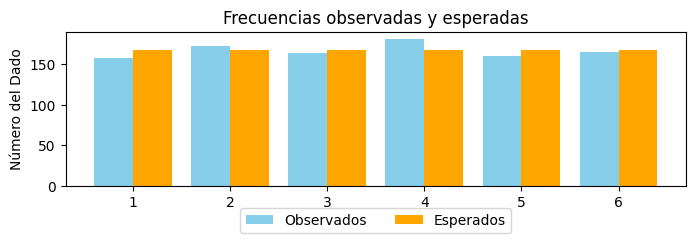

In [10]:
#@title Grafico
import matplotlib.pyplot as plt
import numpy as np

categorias = ['1', '2', '3', '4', '5', '6']
observados = np.array([158, 172, 164, 181, 160, 165])
total = sum(observados)

prob_teoricas = np.array([1/6]*6)
esperados = total * prob_teoricas

x = np.arange(len(categorias))

plt.figure(figsize=(8, 2))
plt.bar(x - 0.2, observados, width=0.4, label='Observados', color='skyblue')
plt.bar(x + 0.2, esperados, width=0.4, label='Esperados', color='orange')

plt.xticks(x, categorias)
plt.ylabel('Número del Dado')
plt.title('Frecuencias observadas y esperadas')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.show()

### a)

Utilizando la prueba de Pearson con aproximación chi-cuadrada,


Lo unico a tener en cuenta que la hipotesis nula es:
$$
p_1 = p_2 = p_3 = p_4 = p_5 = p_6 = 1/6
$$
ya que es un dado honesto y el tamaño de la muestra es:

$$
n = 158 + 172 + 164 + 181 + 160 + 165 = 1000
$$

In [11]:
#@title Estadistico de Pearson
import numpy as np


def estadistico_pearson(frecuencias, p_hip_0, cant_valores):
    assert sum(frecuencias) == cant_valores
    assert len(frecuencias) == len(p_hip_0)

    frecuencias = np.array(frecuencias)
    valores_esperados = np.array([cant_valores*p for p in p_hip_0])

    return np.sum((frecuencias - valores_esperados) ** 2 / valores_esperados)


print(f"t_0: {estadistico_pearson([158, 172, 164, 181, 160, 165], [1/6]*6, 1000)}")

t_0: 2.18


In [61]:
#@title Calculo p-valor (Chi-Cuad)
from scipy.stats import chi2


# NOTE: chi2.sf(x, df) = 1 - chi2.cdf(x, df)

print(f"p-valor: {chi2.sf(2.18, 5):.4f}")
# print(f"p-valor: {1 - chi2.cdf(2.18, 5):.2f}")

t_0 = estadistico_pearson([158, 172, 164, 181, 160, 165], [1/6]*6, 1000)
print(f"p-valor (más exacto): {chi2.sf(t_0, 5)}")
# print(f"p-valor (más exacto): {1 - chi2.cdf(t_0, 5)}")

p-valor: 0.8237
p-valor: 0.82
p-valor (más exacto): 0.8237195392577814
p-valor (más exacto): 0.8237195392577814


### b)

Realizando una simulación

In [13]:
#@title Codigo
import numpy as np

# NOTE: (alternativa)
# from scipy.stats import binom


def ej2b_p_valor(tam_muestra, t_0, ps, n_sim):
    # Dado que los valores esperados son constantes los calculamos
    valores_esperados = np.array([tam_muestra*p for p in ps])

    # Dado que estos valores son fijos, no los calculo en cada iteracion
    # y el ultimo valor tampoco porque ya sabemos que es 1
    ps_ajustados = [ps[i] / (1 - sum(ps[:i])) for i in range(len(ps)-1)]

    p_valor = 0
    for _ in range(n_sim):

        # Calculo de las binomiales
        N_i, n_restante = [], tam_muestra
        for ps_i in ps_ajustados:
            x = np.random.binomial(n_restante, ps_i)
            # NOTE: (alternativa)
            # x = binom.rvs(n_restante, ps_i)
            N_i.append(x)
            n_restante -= x
        N_i.append(n_restante) # Último valor

        # Calculamos el estadistico de pearson
        T = np.sum((N_i - valores_esperados) ** 2 / valores_esperados)

        if T >= t_0:
            p_valor += 1

    return p_valor / n_sim

ej2b_p_valor(1_000, 2.18, [1/6]*6, 10_000)

0.8243

## Ejercicio 3

Calcular una aproximación del p-valor de la hipótesis: “Los siguientes 10 números son aleatorios”:

$$
0.12, 0.18, 0.06, 0.33, 0.72, 0.83, 0.36, 0.27, 0.77, 0.74
$$

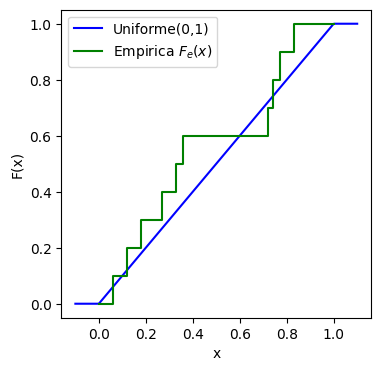

In [14]:
#@title Grafico
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

# Muestra y ordenación
muestra = [0.12, 0.18, 0.06, 0.33, 0.72, 0.83, 0.36, 0.27, 0.77, 0.74]
# muestra = np.random.random(100) # ejemplo con random verdadero
muestra_ordenada = np.sort(muestra)

# Construimos los valores de la función de distribución empírica
n = len(muestra)
x_vals = np.concatenate(([0], muestra_ordenada, [1]))
y_vals = np.concatenate(([0], np.arange(1, n+1) / n, [1]))

# Calculamos la acumulada de una uniforme
x_vals_unif = np.linspace(-0.1, 1.1, 500)
y_vals_unif = uniform.cdf(x_vals_unif, loc=0, scale=1)

# Graficamos
plt.figure(figsize=(4, 4))
plt.plot(x_vals_unif, y_vals_unif, label='Uniforme(0,1)', color='blue')
plt.step(x_vals, y_vals, where='post', label='Empirica $F_e(x)$', color='green')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend(); plt.show()


In [15]:
#@title Estadistico Kolmogorov Smirnov
from scipy.stats import uniform


def estadistico_ks(muestra_ordenada, F_h_0):
    n = len(muestra)

    max1 = max((j+1)/n - F_h_0(y) for j, y in enumerate(muestra_ordenada))
    max2 = max(F_h_0(y) - (j/n) for j, y in enumerate(muestra_ordenada))

    return max(max1, max2)

muestra = [0.12,0.18,0.06,0.33,0.72,0.83,0.36,0.27,0.77,0.74]
muestra_ordenada = np.sort(muestra)
F_h_0 = lambda x: uniform.cdf(x, loc=0, scale=1)
# F_h_0 = lambda x: 0 if x < 0 else 1 if x > 1 else x # NOTE: alternativa

print(f"t_0: {estadistico_ks(muestra_ordenada, F_h_0)}")

t_0: 0.24


In [16]:
#@title Calculo p-valor (simulacion)
import numpy as np


def ej3_p_valor(tam_muestra, t_0, n_sim):
    p_valor = 0
    for _ in range(n_sim):
        # Calculo la muestra
        muestra = np.random.random(tam_muestra)
        muestra_ordenada = np.sort(muestra)

        # Calculamos el estadistico de Kolmogorov Smirnov
        d_j = 0
        for j, u_j in enumerate(muestra_ordenada):
            d_j = max(d_j, ((j+1)/tam_muestra) - u_j, u_j - (j/tam_muestra))

        if d_j >= t_0:
            p_valor += 1

    return p_valor / n_sim

ej3_p_valor(10, 0.24, 10_000)

0.5311

## Ejercicio 4

Calcular una aproximación del p-valor de la hipótesis: “Los siguientes 13 valores provienen de una distribución exponencial con media 50,0”:
$$
86.0, 133.0, 75.0, 22.0, 11.0, 144.0, 78.0, 122.0, 8.0, 146.0, 33.0, 41.0, 99.0
$$

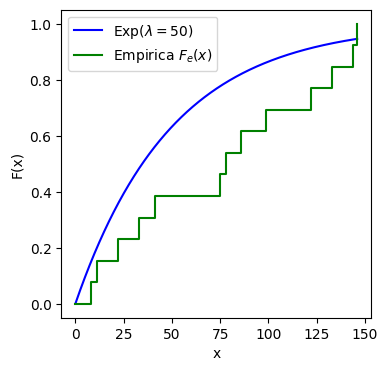

In [26]:
#@title Grafico
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# Muestra y ordenación
muestra = [86.0,133.0,75.0,22.0,11.0,144.0,78.0,122.0,8.0,146.0,33.0,41.0,99.0]
# Ejemplo con exponencial verdadera
# muestra = np.random.exponential(scale=50, size=100)
muestra_ordenada = np.sort(muestra)

# Construimos los valores de la función de distribución empírica
n = len(muestra)
x_vals_emp = np.concatenate(([0], muestra_ordenada))
y_vals_emp = np.concatenate(([0], np.arange(1, n+1) / n))

# Calculamos la acumulada de una exponencial
x_vals_exp = np.linspace(0, max(muestra), 1000)
y_vals_exp = expon.cdf(x_vals_exp, scale=50)

# Graficamos
plt.figure(figsize=(4, 4))
plt.plot(x_vals_exp, y_vals_exp, label='Exp($\lambda=50$)', color='blue')
plt.step(x_vals_emp, y_vals_emp, where='post', label='Empirica $F_e(x)$', color='green')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend(); plt.show()

In [18]:
#@title Estadistico Kolmogorov Smirnov
from scipy.stats import expon


def estadistico_ks(muestra_ordenada, F_h_0):
    n = len(muestra)

    max1 = max((j+1)/n - F_h_0(y) for j, y in enumerate(muestra_ordenada))
    max2 = max(F_h_0(y) - (j/n) for j, y in enumerate(muestra_ordenada))

    return max(max1, max2)

muestra = [86.0,133.0,75.0,22.0,11.0,144.0,78.0,122.0,8.0,146.0,33.0,41.0,99.0]
muestra_ordenada = np.sort(muestra)

F_h_0 = lambda x: expon.cdf(x, scale=50)

print(f"t_0: {estadistico_ks(muestra_ordenada, F_h_0)}")

t_0: 0.3922544552361856


In [37]:
#@title Calculo p-valor (simulacion con uniformes)
import numpy as np


def ej4_p_valor_con_uniformes(tam_muestra, t_0, n_sim):
    p_valor = 0
    for _ in range(n_sim):
        # Calculo la muestra
        muestra = np.random.random(tam_muestra)
        muestra_ordenada = np.sort(muestra)

        # Calculamos el estadistico de Kolmogorov Smirnov
        d_j = 0
        for j, u_j in enumerate(muestra_ordenada):
            d_j = max(d_j, ((j+1)/tam_muestra) - u_j, u_j - (j/tam_muestra))

        if d_j >= t_0:
            p_valor += 1

    return p_valor / n_sim

ej4_p_valor_con_uniformes(13, 0.3922544552361856, 10_000)

0.025592

#### Analisis de  la simulacion con uniformes

Dado la simulacion con uniformes dio $p-valor = 0.025 < 0.05$. Mejor realizar una simulacion que no utilice uniformes sino muestras de exponenciales con media 50 y en cada simulacion el parametro $λ se estima nuevamente.

In [40]:
#@title Calculo p-valor (simulacion mas exacta)
import numpy as np
from scipy.stats import expon


def ej4_p_valor(tam_muestra, t_0, n_sim):
    p_valor = 0
    for _ in range(n_sim):
        # Calculo la muestra
        muestra = expon.rvs(scale=50, size=tam_muestra)
        muestra_ordenada = np.sort(muestra)

        # Defino la nueva F segun la muestra
        F_h0 = lambda x: expon.cdf(x, scale=np.mean(muestra))

        # Calculamos el estadistico de Kolmogorov Smirnov
        d_j = 0
        for j, u_j in enumerate(muestra_ordenada):
            d_j = max(d_j, ((j+1)/tam_muestra) - F_h0(u_j), F_h0(u_j) - (j/tam_muestra))

        if d_j >= t_0:
            p_valor += 1

    return p_valor / n_sim

ej4_p_valor(13, 0.3922544552361856, 10_000)

0.0008

## Ejercicio 5

Calcular una aproximación del p-valor de la prueba de que los siguientes datos corresponden a una distribución binomial con parámetros $(n = 8, p)$, donde p no se conoce:
$$
6, 7, 3, 4, 7, 3, 7, 2, 6, 3, 7, 8, 2, 1, 3, 5, 8, 7
$$

In [109]:
#@title Constantes
n = 8
muestra = [6, 7, 3, 4, 7, 3, 7, 2, 6, 3, 7, 8, 2, 1, 3, 5, 8, 7]

In [110]:
#@title Estadistico de Pearson
import numpy as np
from scipy.stats import chi2, binom


def estadistico_pearson(frecuencias, p_hip_0):
    """Se asume que frecuencias[i] corresponden con p_hip_0[i]."""
    assert len(frecuencias) == len(p_hip_0)

    n = sum(frecuencias)
    return sum((N-n*p)**2/(n*p) for N, p in zip(frecuencias, p_hip_0))

frecuencias = np.bincount(muestra, minlength=n+1)
# frecuencias = [muestra.count(i) for i in range(8+1)]

# Esto porque la E(Bin(n,p)) = np entonces E(Bin(n,p))/n = np/p = p
p_estimacion = np.mean(muestra) / n

p_hip_0 = [binom.pmf(k, n=n, p=p_estimacion) for k in range(n+1)]

print(f"t_0: {estadistico_pearson(frecuencias, p_hip_0)}")

t_0: 31.49933093415532


In [111]:
#@title Calculo p-valor (Chi-Cuad)
from scipy.stats import chi2


# NOTE: chi2.sf(x, df) = 1 - chi2.cdf(x, df)

# NOTE: Restamos -2 ya que estamos estimando el parametro p
# NOTE: Como es binomial los valores posibles son desde:
#       0,...,n es decir n+1 valores.

print(f"p-valor: {chi2.sf(31.49933, 9-1-1):.8f}")
# print(f"p-valor: {1 - chi2.cdf(31.49933, 8-1-1):.2f}")

t_0 = estadistico_pearson(frecuencias, p_hip_0)
print(f"p-valor (más exacto): {chi2.sf(t_0 , 9-1-1)}")
# print(f"p-valor (más exacto): {1 - chi2.cdf(t_0 , 8-1-1)}")

p-valor: 0.00005028
p-valor (más exacto): 5.027994320424087e-05


In [112]:
#@title Codigo estimacion del p-valor (simulacion)
import numpy as np


def ej5_p_valor(tam_muestra, t_0, bin_n, bin_p, n_sim):
    binomial = binom(bin_n, bin_p)

    p_valor = 0
    for _ in range(n_sim):
        # Generamos una muestra
        muestra = binomial.rvs(tam_muestra)

        # Calculamos en base a la muestra p
        p_estimacion = np.mean(muestra) / bin_n

        # Calculamos los nuevos ps
        ps = [binom.pmf(k, n=bin_n, p=p_estimacion) for k in range(bin_n+1)]

        # Contamos las frecuencias
        frecuencias = np.bincount(muestra, minlength=8+1)

        # Calculamos el estadistico de pearson
        total = sum(frecuencias)
        T = sum((N-total*p)**2/(total*p) for N, p in zip(frecuencias, ps))

        if T >= t_0:
            p_valor += 1

    return p_valor / n_sim


ej5_p_valor(len(muestra), t_0, n, p_estimacion, 10_000)

0.0104

## Ejercicio 6


Un escribano debe validar un juego en cierto programa de televisión. El mismo consiste en hacer girar una rueda y obtener un premio según el sector de la rueda que coincida con una aguja.

Hay 10 premios posibles, y las áreas de la rueda para los distintos premios, numerados del 1 al 10, son respectivamente:

$$ 31\%, 22\%, 12\%, 10\%, 8\%, 6\%, 4\%, 4\%, 2\%, 1\% $$

Los premios con número alto (e.j. un auto 0Km) son mejores que los premios con número bajo (e.j. 2x1 para entradas en el cine). El escribano hace girar la rueda hasta que se cansa, y anota cuántas veces sale cada sector. Los resultados, para los premios del 1 al 10, respectivamente, son:

$$ 188, 138, 87, 65, 48, 32, 30, 34, 13, 2 $$

a) Construya una tabla con los datos disponibles

b) Diseñe una prueba de hipótesis para determinar si la rueda es justa

c) Defina el p-valor a partir de la hipótesis nula

d) Calcule el p-valor bajo la hipótesis de que la rueda es justa, usando la aproximación chi cuadrado

e) Calcule el p-valor bajo la hipótesis de que la rueda es justa, usando una simulación.

## Ejercicio 7

Generar los valores correspondientes a 30 variables aleatorias exponenciales independientes, cada una con media 1. Luego, en base al estadístico de prueba de Kolmogorov-Smirnov, aproxime el p−valor de la prueba de que los datos realmente provienen de una distribución exponencial con media 1.

## Ejercicio 8

Se sortean elementos de un conjunto de datos que tiene una distribución t-student de 11 grados de libertad. El investigador, que no conoce la forma verdadera de la distribución, asume que la misma es normal.

Analice la validez de esta suposición para muestras de tamaños 10, 20, 100 y 1000 elementos Para ello realice simulaciones numéricas e implemente el test de Kolmogorov-Smirnov a los datos simulados, asumiendo una distribución N(0,1). Presente los resultados en una tabla que contenga el número de elementos
de la simulación, el valor del estadístico D y el p−valor

> **AYUDA**:
>
> Función de probabilidad normal: Para obtener la función de probabilidad normal, se puede usar la función `math.erf`. Por ejemplo, la cantidad `math.erf(x/math.sqrt(2.))/2.+0.5` equivale a:
>
> $$ \int_{-∞}^x N(0,1)(t)dt$$

> **AYUDA**:
>
> Generación de números aleatorios con una distribución t-student: Utilice el siguiente código para generar números aleatorios que siguen una distribución T-student:
> ```python
> import math
> import random
>
> def rt(df): # df grados de libertad
>    x = random.gauss(0.0, 1.0)
>    y = 2.0*random.gammavariate(0.5*df, 2.0)
>    return x / (math.sqrt(y/df))
>```


## Ejercicio 9

En un estudio de vibraciones, una muestra aleatoria de 15 componentes del avión fueron sometidos a fuertes vibraciones hasta que se evidenciaron fallas estructurales. Los datos proporcionados son los minutos transcurridos hasta que se evidenciaron dichas fallas.

$$
1.6, 10.3, 3.5, 13.5, 18.4, 7.7, 24.3, 10.7, 8.4, 4.9, 7.9, 12, 16.2, 6.8, 14.7
$$

Pruebe la hipótesis nula de que estas observaciones pueden ser consideradas como una muestra de la
distribución exponencial

## Ejercicio 10

Decidir si los siguientes datos corresponden a una distribución Normal:

$$
91.9, 97.8, 111.4, 122.3, 105.4, 95.0, 103.8, 99.6, 96.6, 119.3, 104.8, 101.7
$$

Calcular una aproximación del p−valor.